This note book is based on this post: <br>

https://heartbeat.comet.ml/n-grams-and-how-to-implement-them-with-the-python-nltk-library-1379d0945f43

In [1]:
from nltk import download
download('stopwords')
download('punkt')
from nltk import word_tokenize
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from nltk.util import ngrams 

sentence = "Natural Language Processing using N-grams is incredibly awesome."

def generate_n_grams(sentence, n):
  unigrams = ngrams(sentence.split(), n)
  return [unigram for unigram in unigrams]

In [3]:
# n = 1
generate_n_grams(sentence, 1)

[('Natural',),
 ('Language',),
 ('Processing',),
 ('using',),
 ('N-grams',),
 ('is',),
 ('incredibly',),
 ('awesome.',)]

In [4]:
# n = 2
generate_n_grams(sentence, 2)

[('Natural', 'Language'),
 ('Language', 'Processing'),
 ('Processing', 'using'),
 ('using', 'N-grams'),
 ('N-grams', 'is'),
 ('is', 'incredibly'),
 ('incredibly', 'awesome.')]

In [5]:
# n = 3
generate_n_grams(sentence, 3)

[('Natural', 'Language', 'Processing'),
 ('Language', 'Processing', 'using'),
 ('Processing', 'using', 'N-grams'),
 ('using', 'N-grams', 'is'),
 ('N-grams', 'is', 'incredibly'),
 ('is', 'incredibly', 'awesome.')]

In [6]:
import pandas as pd
import string #library that contains sets of punctuation
import nltk
from nltk.corpus import stopwords
from collections import defaultdict
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
data = pd.read_csv("/content/drive/MyDrive/02- N-grams and How to Implement Them With the Python NLTK Library/Financial_Sentiment.csv")
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB
None


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [9]:
data['Sentiment'].unique(), data['Sentiment'].value_counts()

(array(['positive', 'negative', 'neutral'], dtype=object), neutral     3130
 positive    1852
 negative     860
 Name: Sentiment, dtype: int64)

In [10]:
data.isnull().sum()


Sentence     0
Sentiment    0
dtype: int64

In [11]:
train_set, test_set = train_test_split(data, test_size=0.20, random_state=42)

train_set.shape, test_set.shape

# ((4673, 2), (1169, 2))

((4673, 2), (1169, 2))

In [12]:
def generate_ngrams(sentence, ngram=1):
    # first lets convert the senetence into lower case
    sentence_lower = sentence.lower()
    sentence = re.sub(r'[^a-zA-Z0-9\s]', ' ', sentence_lower)
    
    # Remove stopwords, and punctuation
    stop = set(stopwords.words('english') + list(string.punctuation))
    
    # tokenize and display tokenized sentence
    clean_words = [i for i in word_tokenize(sentence) if i not in stop]
    # print(f"\n===Tokens:=== \n{clean_words}\n")
    
    # Generate the n-grams of any size
    ngrams = zip(*[clean_words[i:] for i in range(ngram)])
    return [" ".join(ngram) for ngram in ngrams]

In [13]:
# Generate n-grams of N=4 from the text
text = 'Natural language Processing(NLP) is an awesome task! Learn N-grams today!'
generate_ngrams(text,4)

['natural language processing nlp',
 'language processing nlp awesome',
 'processing nlp awesome task',
 'nlp awesome task learn',
 'awesome task learn n',
 'task learn n grams',
 'learn n grams today']

In [14]:
# Initialize a dictionary to store the words together with their counts
positiveWords=defaultdict(int)

# 1. traverse the dataframe pick sentences with positive sentiment
#   1.1. traverse through sentences and pick each word and preprocess 
#        them with the generate_ngrams() functions we created
#       1.1.1 store the words in a defaultdict 
# 2. convert the dictionary into a df

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text):
        positiveWords[word]+=1
df_positive = pd.DataFrame(sorted(positiveWords.items(),key=lambda x:x[1],reverse=True))

In [15]:
negativeWords = defaultdict(int)

for text in train_set[train_set['Sentiment']=='negative']['Sentence']:
    for word in generate_ngrams(text):
        negativeWords[word]+=1

df_negative = pd.DataFrame(sorted(negativeWords.items(),key=lambda x:x[1],reverse=True))

In [16]:
neutralWords = defaultdict(int)
for text in train_set[train_set['Sentiment']=='neutral']['Sentence']:
    for word in generate_ngrams(text):
        neutralWords[word]+=1

df_neutral = pd.DataFrame(sorted(neutralWords.items(),key=lambda x:x[1],reverse=True))

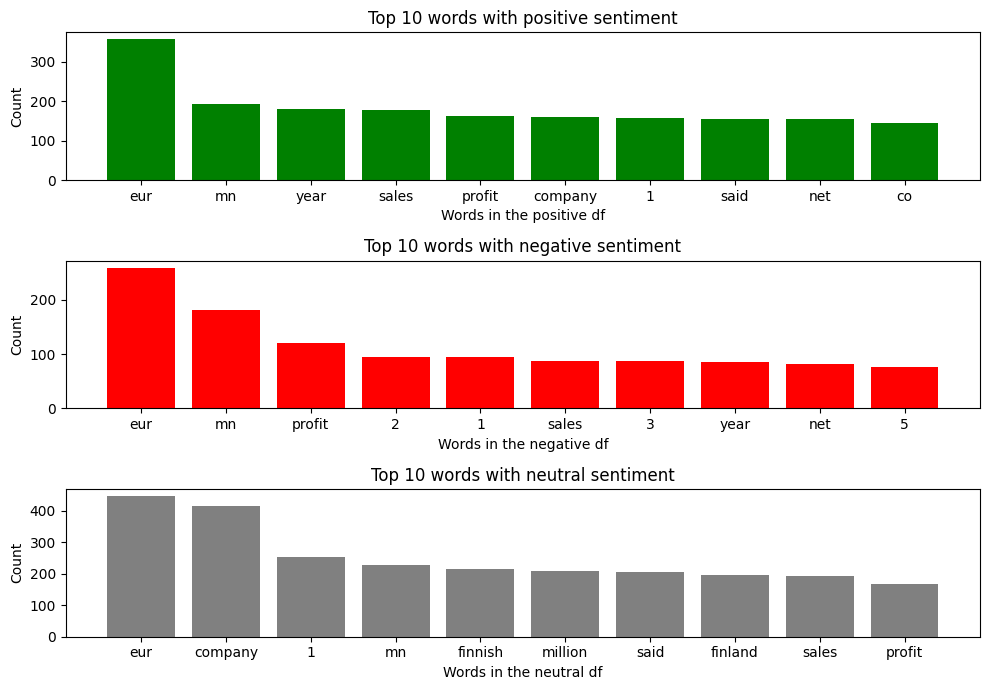

In [17]:
x_positive = df_positive[0][:10]
y_positive = df_positive[1][:10]

x_negative = df_negative[0][:10]
y_negative = df_negative[1][:10]

x_neutral = df_neutral[0][:10]
y_neutral = df_neutral[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(10, 7), dpi=100)

ax[0].bar(x_positive, y_positive, color='g')
ax[0].set_title('Top 10 words with positive sentiment')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative, y_negative, color='r')
ax[1].set_title('Top 10 words with negative sentiment')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral, y_neutral, color='gray')
ax[2].set_title('Top 10 words with neutral sentiment')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')
plt.tight_layout()

In [18]:
# Defined new dictionaries

positiveWords_bi=defaultdict(int)
negativeWords_bi=defaultdict(int)
neutralWords_bi=defaultdict(int)

In [19]:
# Creating positive bigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 2):
        positiveWords_bi[word]+=1
df_positive_bi = pd.DataFrame(sorted(positiveWords_bi.items(),key=lambda x:x[1],reverse=True))
df_positive_bi

,0,1
0,net sales,80
1,operating profit,77
2,http stks,73
3,stks co,73
4,https co,62
...,...,...
14097,downward slide,1
14098,slide cutting,1
14099,cutting sales,1
14100,sales decline,1


In [20]:
# Creating negative bigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 2):
        negativeWords_bi[word]+=1
df_negative_bi = pd.DataFrame(sorted(negativeWords_bi.items(),key=lambda x:x[1],reverse=True))
df_negative_bi

,0,1
0,net sales,80
1,operating profit,77
2,http stks,73
3,stks co,73
4,https co,62
...,...,...
14097,downward slide,1
14098,slide cutting,1
14099,cutting sales,1
14100,sales decline,1


In [21]:
# Creating neutral bigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 2):
        neutralWords_bi[word]+=1
df_neutral_bi = pd.DataFrame(sorted(neutralWords_bi.items(),key=lambda x:x[1],reverse=True))
df_neutral_bi

,0,1
0,net sales,80
1,operating profit,77
2,http stks,73
3,stks co,73
4,https co,62
...,...,...
14097,downward slide,1
14098,slide cutting,1
14099,cutting sales,1
14100,sales decline,1


0               net sales
1        operating profit
2               http stks
3                 stks co
4                https co
5                  mn eur
6    corresponding period
7                   eur 0
8              net profit
9             profit rose
Name: 0, dtype: object


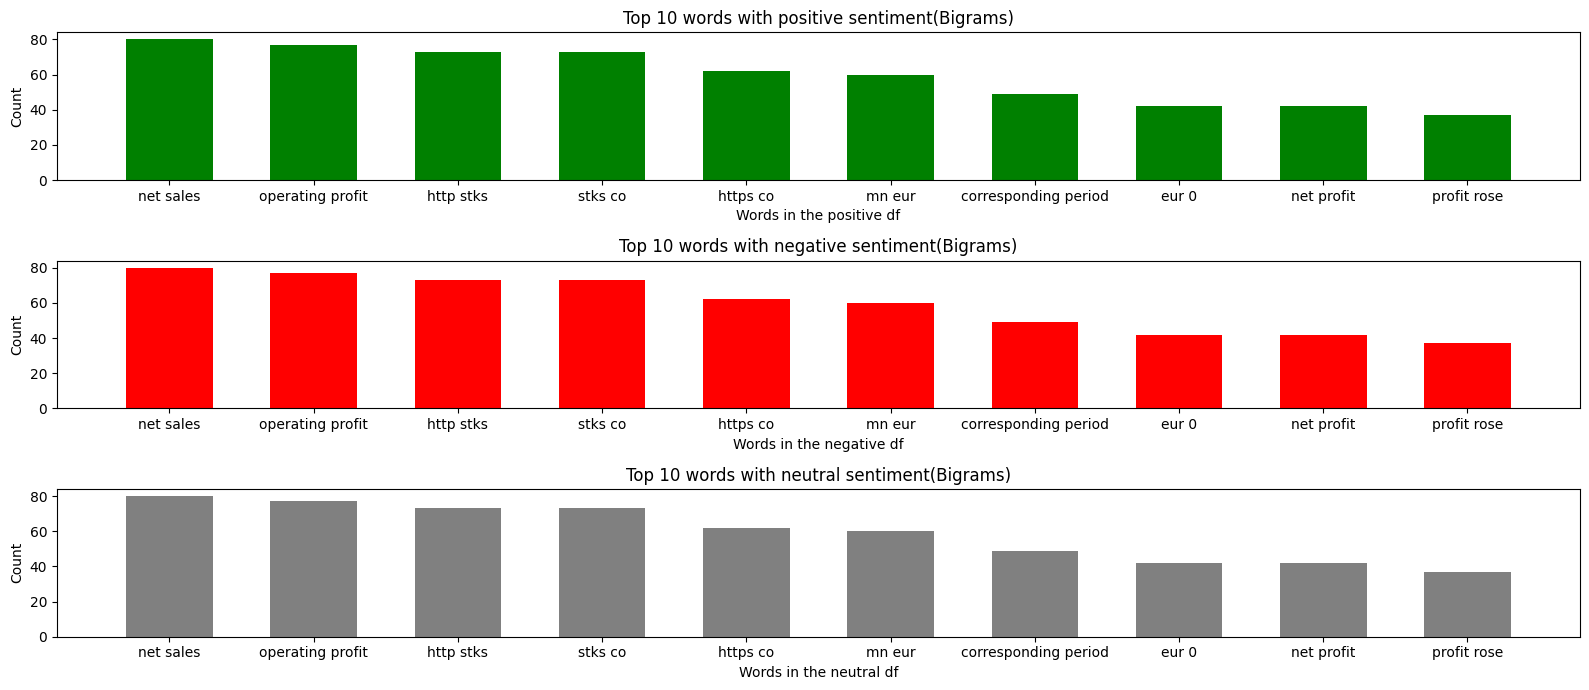

In [28]:
x_positive_bi = df_positive_bi[0][:10]
y_positive_bi = df_positive_bi[1][:10]

print(x_positive_bi)
x_negative_bi = df_negative_bi[0][:10]
y_negative_bi = df_negative_bi[1][:10]

x_neutral_bi = df_neutral_bi[0][:10]
y_neutral_bi = df_neutral_bi[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(16, 7), dpi=100)

ax[0].bar(x_positive_bi, y_positive_bi, color='g', width= 0.6)
ax[0].set_title('Top 10 words with positive sentiment(Bigrams)')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative_bi, y_negative_bi, color='r', width= 0.6)
ax[1].set_title('Top 10 words with negative sentiment(Bigrams)')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral_bi, y_neutral_bi, color='gray', width= 0.6)
ax[2].set_title('Top 10 words with neutral sentiment(Bigrams)')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')
plt.tight_layout()

In [23]:
positiveWords_tri = defaultdict(int)
negativeWords_tri = defaultdict(int)
neutralWords_tri = defaultdict(int)

In [24]:
# Creating positive trigrams

for text in train_set[train_set['Sentiment']=='positive']['Sentence']:
    for word in generate_ngrams(text, 3):
        positiveWords_tri[word] += 1
df_positive_tri = pd.DataFrame(sorted(positiveWords_tri.items(),key=lambda x:x[1],reverse=True))
df_positive_tri

,0,1
0,http stks co,73
1,mn corresponding period,24
2,profit rose eur,23
3,first nine months,20
4,operating profit rose,19
...,...,...
15271,breaks downward slide,1
15272,downward slide cutting,1
15273,slide cutting sales,1
15274,cutting sales decline,1


In [25]:
for text in train_set[train_set['Sentiment']=='negative']['Sentence']:
    for word in generate_ngrams(text, 3):
        negativeWords_tri[word]+=1
df_negative_tri = pd.DataFrame(sorted(negativeWords_tri.items(),key=lambda x:x[1],reverse=True))
df_negative_tri

,0,1
0,http stks co,27
1,mn corresponding period,18
2,compared profit eur,14
3,mn third quarter,10
4,earnings per share,10
...,...,...
6809,compared eur 11,1
6810,11 2 million,1
6811,siga bid reargument,1
6812,bid reargument denied,1


In [26]:
# # Creating neutral trigrams

for text in train_set[train_set['Sentiment']=='neutral']['Sentence']:
    for word in generate_ngrams(text, 3):
        neutralWords_tri[word]+=1
df_neutral_tri = pd.DataFrame(sorted(neutralWords_tri.items(),key=lambda x:x[1],reverse=True))
df_neutral_tri

,0,1
0,mn corresponding period,20
1,net sales eur,16
2,compared profit eur,14
3,earnings per share,12
4,operating profit eur,12
...,...,...
26066,prefab avesta plate,1
26067,avesta plate service,1
26068,plate service centre,1
26069,service centre nordic,1


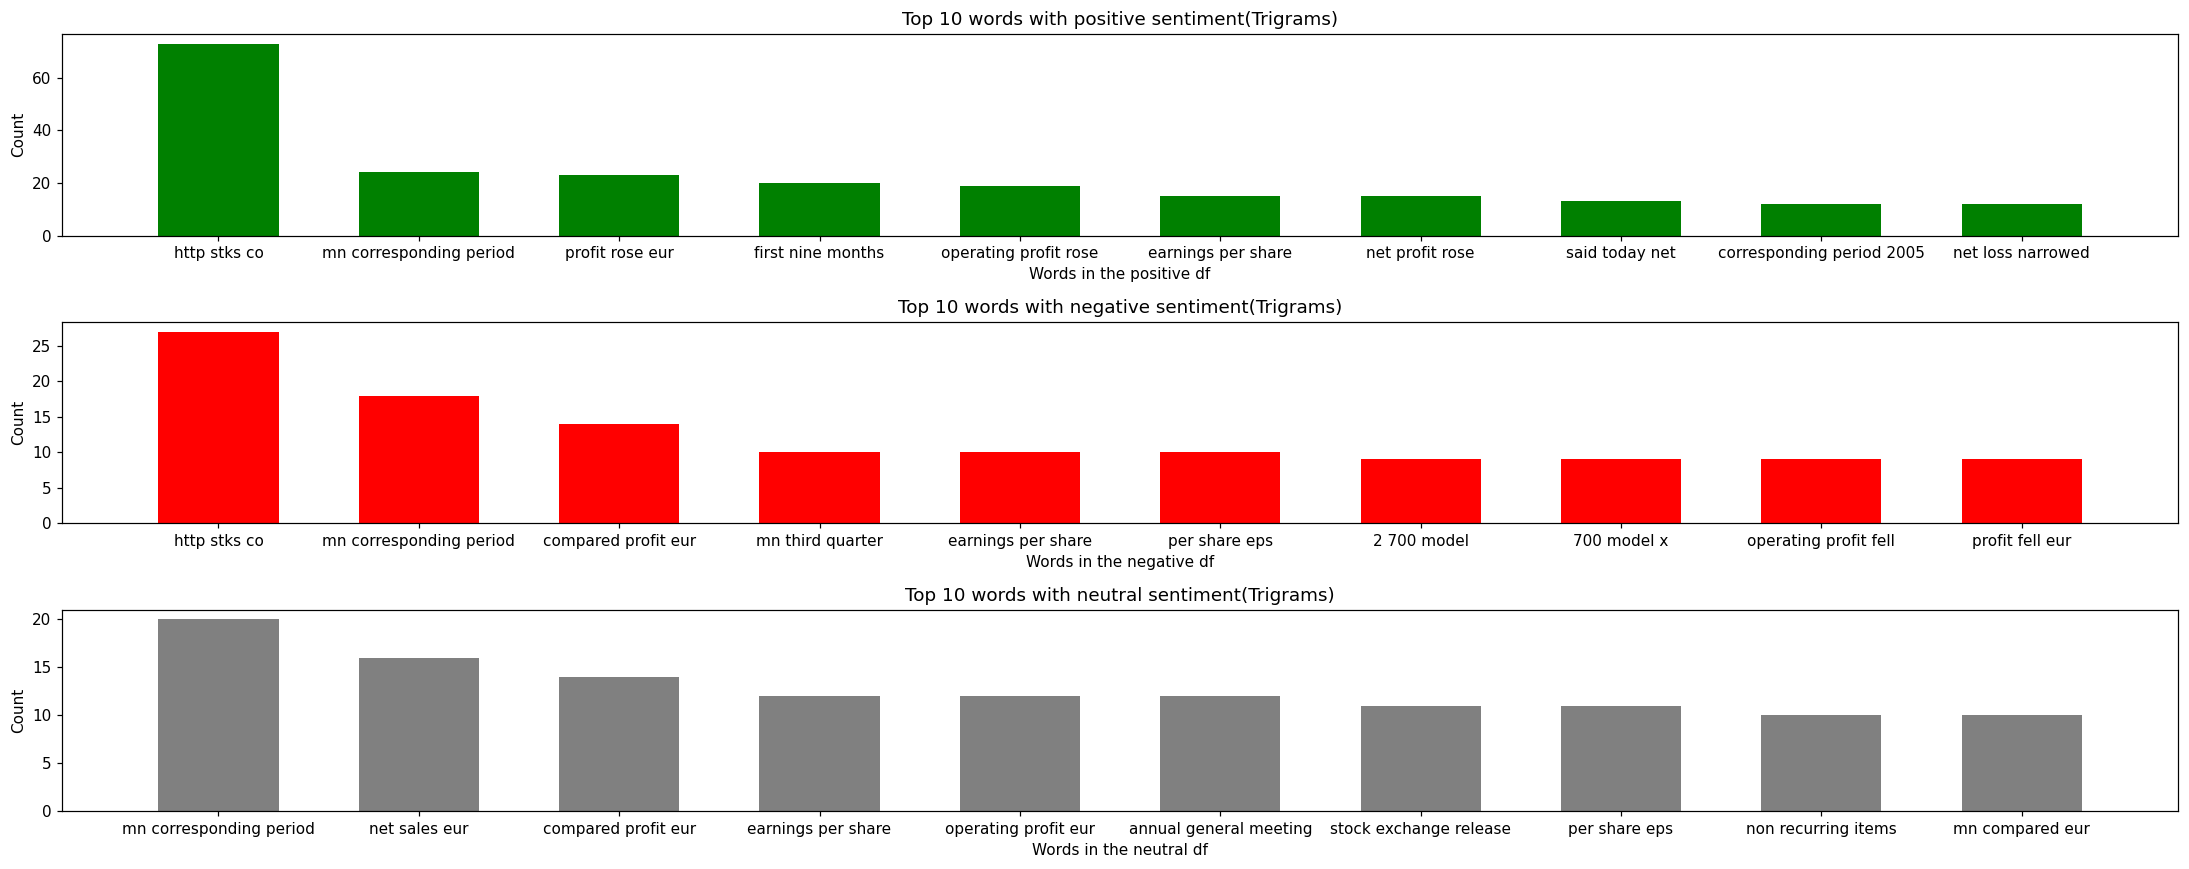

In [27]:
x_positive_tri = df_positive_tri[0][:10]
y_positive_tri = df_positive_tri[1][:10]

x_negative_tri = df_negative_tri[0][:10]
y_negative_tri = df_negative_tri[1][:10]

x_neutral_tri = df_neutral_tri[0][:10]
y_neutral_tri = df_neutral_tri[1][:10]


fig, ax = plt.subplots(3, 1, figsize=(20, 8), dpi=110)

ax[0].bar(x_positive_tri, y_positive_tri, color='g', width= 0.6)
ax[0].set_title('Top 10 words with positive sentiment(Trigrams)')
ax[0].set_xlabel('Words in the positive df')
ax[0].set_ylabel('Count')

ax[1].bar(x_negative_tri, y_negative_tri, color='r', width= 0.6)
ax[1].set_title('Top 10 words with negative sentiment(Trigrams)')
ax[1].set_xlabel('Words in the negative df')
ax[1].set_ylabel('Count')

ax[2].bar(x_neutral_tri, y_neutral_tri, color='gray', width= 0.6)
ax[2].set_title('Top 10 words with neutral sentiment(Trigrams)')
ax[2].set_xlabel('Words in the neutral df')
ax[2].set_ylabel('Count')
plt.tight_layout()
